In [1]:
def exporter(data, filename, path):
    data.to_csv(path+filename+'.csv', sep=',', index=False)

# Modeling

- Which model type(s) should be used?
- Is the scale applicable to the modeling approach chosen?
- Should the previous steps be adapted?

In [2]:
##
# IMPORTS
#
import os
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets, linear_model, metrics
#from sklearn.metrics import mean_squared_error, r2_score

##
# SETTINGS
#
# Render all plots inline (instead of popup)
%matplotlib inline
# set theme for plotting
sns.set_theme(style="darkgrid")

##
# RUN
#
# run previous notebook
#%run ./02-data-preparation.ipynb

**Q:** Is there a relation between covid-cases and gdp? Are countries with weaker economies more affected than stronger ones?

In [3]:
top5 = pd.read_csv('./data/00-raw/top.csv')
lowest5 = pd.read_csv('./data/00-raw/lowest.csv')

# create rank by gdp first
gdp_rank = pd.read_csv('./data/01-prep/by-aggregation/gdp/'+'gdp_grouped.csv')

# store all locations with nan elsewhere
df_nan = gdp_rank[gdp_rank['gdp_average'].isna()].location
# remove rows with nan
gdp_rank.dropna(inplace=True)
print ('The following regions had to be removed due to missing GDP values:\n',df_nan)

# sort df by gdp in a descending order 
gdp_rank.sort_values(by=['gdp_average'], inplace=True, ascending=False, ignore_index=True)

The following regions had to be removed due to missing GDP values:
 1                        Africa
4                       Andorra
6                      Anguilla
10                         Asia
47                         Cuba
63                       Europe
64               European Union
65               Faeroe Islands
66             Falkland Islands
75                    Gibraltar
77                    Greenland
80                     Guernsey
91                International
95                  Isle of Man
100                      Jersey
113               Liechtenstein
129                      Monaco
142               North America
144             Northern Cyprus
146                     Oceania
161                Saint Helena
177                     Somalia
179               South America
188                       Syria
189                      Taiwan
198    Turks and Caicos Islands
207                     Vatican
Name: location, dtype: object


In [4]:
# import covid dataset
covid = pd.read_csv('./data/01-prep/by-topic/covid/'+'covid.csv', parse_dates=['date'])
covid = covid[covid.year == 2020]
covid_rate=covid.groupby(['year','location','month'])['new_cases'].sum().to_frame(name = 'monthly_new_cases').reset_index()

covid_rate['percentage_growth_rate_cases']= (covid_rate['monthly_new_cases'] - covid_rate['monthly_new_cases'].shift(1)) * 100/ covid_rate['monthly_new_cases'].shift(1)

In [5]:

gdp = pd.read_csv('./data/01-prep/by-topic/gdp/'+'gdp-quarter.csv')
print(gdp.LOCATION.unique())

['KOR' 'AUS' 'ISL' 'GBR' 'EST' 'DNK' 'ESP' 'JPN' 'NOR' 'HUN' 'CAN' 'ARG'
 'SVN' 'FIN' 'BRA' 'NLD' 'USA' 'SVK' 'MEX' 'BEL' 'ISR' 'TUR' 'IND' 'LVA'
 'CZE' 'POL' 'DEU' 'IDN' 'LUX' 'ZAF' 'RUS' 'PRT' 'ITA' 'AUT' 'IRL' 'CHE'
 'NZL' 'CHN' 'CHL' 'SWE' 'FRA' 'GRC' 'COL' 'LTU' 'SAU' 'BGR' 'ROU']


In [6]:
# import gdp dataset
gdp = pd.read_csv('./data/01-prep/by-topic/gdp/'+'gdp-quarter.csv')

covid_gdp_merged = covid[covid.iso_code.isin(gdp.LOCATION)]

covid_gdp_merged['gdp_percentage_change'] = np.nan
Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9] # remark: no Data for 2020Q4

for srcIndex, srcRow in covid_gdp_merged.iterrows():
    srcLocation = srcRow['iso_code']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in gdp.iterrows():
        if (srcLocation == tgRow['LOCATION'] and srcMonth in Q1 and tgRow['TIME']=='2020-Q1'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q2 and tgRow['TIME']=='2020-Q2'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q3 and tgRow['TIME']=='2020-Q3'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value



In [7]:
gdp_monthly = covid_gdp_merged.groupby(['year','location','month'])['gdp_percentage_change'].mean()

covid_gdp_rate_merged = pd.merge(gdp_monthly, covid_rate ,on=['location','year','month'])
exporter(covid_gdp_rate_merged,'covid_gdp_rate_merged','./data/01-prep/merged/')

# create upper and lower bound
gdp_top_5 = ['Luxembourg', 'Switzerland','Ireland','Norway','Finland']#gdp_rank.head(6)
gdp_lowest_5 = ['Romania', 'India', 'South Africa', 'Hungary', 'Greece']

In [8]:


# get high case rate
covid_sum = pd.read_csv('./data/01-prep/by-aggregation/covid/'+'covid_grouped.csv')
covid_rank = covid_sum.sort_values(by=['covid_sum'], ascending=False, ignore_index=True)


# create subset based on bounds
covid_gdp_merged_top_5 = covid[covid.location.isin(gdp_top_5)]
covid_gdp_merged_top_5['gdp_percentage_change'] = np.nan

covid_gdp_merged_lowest_5 = covid[covid.location.isin(gdp_lowest_5)]
covid_gdp_merged_lowest_5['gdp_percentage_change'] = np.nan

Q1 = [1,2,3]
Q2 = [4,5,6]
Q3 = [7,8,9] # remark: no Data for 2020Q4

for srcIndex, srcRow in covid_gdp_merged.iterrows():
    srcLocation = srcRow['iso_code']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in gdp.iterrows():
        if (srcLocation == tgRow['LOCATION'] and srcMonth in Q1 and tgRow['TIME']=='2020-Q1'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q2 and tgRow['TIME']=='2020-Q2'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q3 and tgRow['TIME']=='2020-Q3'):
           covid_gdp_merged.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value

for srcIndex, srcRow in covid_gdp_merged_top_5.iterrows():
    srcLocation = srcRow['iso_code']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in top5.iterrows():
        if (srcLocation == tgRow['LOCATION'] and srcMonth in Q1 and tgRow['TIME']=='2020-Q1'):
           covid_gdp_merged_top_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q2 and tgRow['TIME']=='2020-Q2'):
           covid_gdp_merged_top_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q3 and tgRow['TIME']=='2020-Q3'):
           covid_gdp_merged_top_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value

for srcIndex, srcRow in covid_gdp_merged_lowest_5.iterrows():
    srcLocation = srcRow['iso_code']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in lowest5.iterrows():
        if (srcLocation == tgRow['LOCATION'] and srcMonth in Q1 and tgRow['TIME']=='2020-Q1'):
           covid_gdp_merged_lowest_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q2 and tgRow['TIME']=='2020-Q2'):
           covid_gdp_merged_lowest_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value
        elif (srcLocation == tgRow['LOCATION'] and srcMonth in Q3 and tgRow['TIME']=='2020-Q3'):
           covid_gdp_merged_lowest_5.loc[srcIndex,'gdp_percentage_change'] = tgRow.Value

covid_rank.drop(covid_rank[covid_rank.covid_sum==0].index,inplace=True)
exporter(covid_gdp_merged ,'covid_gdp_merged','./data/01-prep/merged/')
exporter(covid_gdp_merged_top_5 ,'covid_gdp_merged_top_5','./data/01-prep/merged/')
exporter(covid_gdp_merged_lowest_5 ,'covid_gdp_merged_lowest_5','./data/01-prep/merged/')

,continent,iso_code,location,year,month,weekday,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index,gdp_percentage_change
2539,South America,ARG,Argentina,2020,1,2,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-4.110562
2540,South America,ARG,Argentina,2020,1,3,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-4.110562
2541,South America,ARG,Argentina,2020,1,4,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-4.110562
2542,South America,ARG,Argentina,2020,1,5,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-4.110562
2543,South America,ARG,Argentina,2020,1,6,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,-4.110562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67677,North America,USA,United States,2020,12,6,2020-12-27,19222891.0,155317.0,339895.0,1422.0,58074.735,469.232,1026.865,4.296,0.97,71.76,NaN
67678,North America,USA,United States,2020,12,0,2020-12-28,19396787.0,173896.0,341924.0,2029.0,58600.096,525.361,1032.995,6.130,0.99,71.76,NaN
67679,North America,USA,United States,2020,12,1,2020-12-29,19595354.0,198567.0,345561.0,3637.0,59199.992,599.896,1043.983,10.988,1.02,71.76,NaN
67680,North America,USA,United States,2020,12,2,2020-12-30,19827770.0,232416.0,349305.0,3744.0,59902.149,702.158,1055.294,11.311,1.05,71.76,NaN


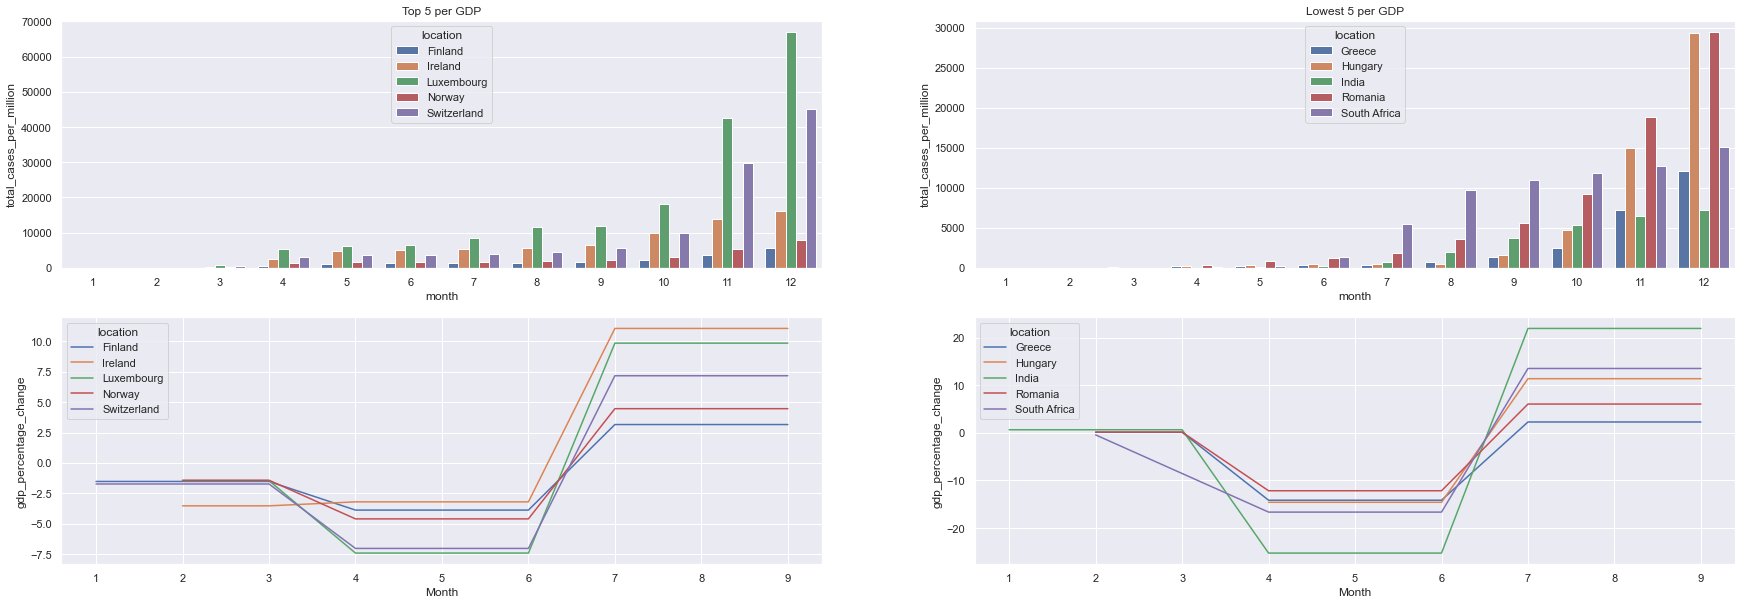

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(30,10))
axes[0,0].set_title('Top 5 per GDP')
axes[0,0].set_xlabel('Month')

#numeric_cols = covid_gdp_merged.select_dtypes(include=[np.number]).columns
#covid_gdp_rate_merged=covid_gdp_rate_merged.apply(zscore)

high = covid_gdp_rate_merged[covid_gdp_rate_merged.location.isin(gdp_top_5)]
low = covid_gdp_rate_merged[covid_gdp_rate_merged.location.isin(gdp_lowest_5)]


sns.barplot(ax=axes[0,0], x=covid_gdp_merged_top_5['month'], y=covid_gdp_merged_top_5['total_cases_per_million'], hue=covid_gdp_merged_top_5['location'], ci=None);


axes[0,1].set_title('Lowest 5 per GDP')
axes[0,1].set_xlabel('Month')
sns.barplot(ax=axes[0,1], x=covid_gdp_merged_lowest_5['month'], y=covid_gdp_merged_lowest_5['total_cases_per_million'], hue=covid_gdp_merged_lowest_5['location'], ci=None);

axes[1,0].set_xlabel('Month')
sns.lineplot(ax=axes[1,0], x=high['month'], y=high['gdp_percentage_change'], hue=high['location'], ci=None);

axes[1,1].set_xlabel('Month')
sns.lineplot(ax=axes[1,1], x=low['month'], y=low['gdp_percentage_change'], hue=low['location'], ci=None);

## linear regression

<AxesSubplot:xlabel='percentage_growth_rate_cases', ylabel='gdp_percentage_change'>

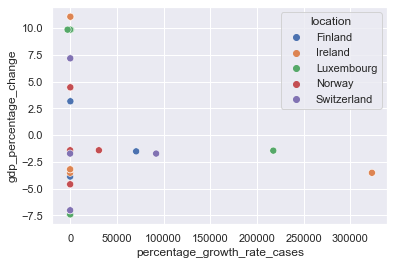

In [134]:
x_axis = high.percentage_growth_rate_cases
y_axis = high.gdp_percentage_change
classes = high.location

sns.scatterplot(x_axis,y_axis, hue=classes,s=50)

### Apply Z-Score

In [135]:
# remove inf and nan
covid_gdp_rate_merged.replace([np.inf, -np.inf], np.nan,inplace=True)
high.replace([np.inf, -np.inf], np.nan,inplace=True)
low.replace([np.inf, -np.inf], np.nan,inplace=True)

covid_gdp_rate_merged.dropna(inplace=True)
high.dropna(inplace=True)
low.dropna(inplace=True)

# use z-scores for standardization
# Standardization is the concept and step of putting different variables on the same scale. This concept allows comparing scores between different types of variables.
covid_gdp_rate_merged['pgr_cases_zscore'] = (covid_gdp_rate_merged.percentage_growth_rate_cases-covid_gdp_rate_merged.percentage_growth_rate_cases.mean())/covid_gdp_rate_merged.percentage_growth_rate_cases.std()

high['pgr_cases_zscore'] = (high.percentage_growth_rate_cases-high.percentage_growth_rate_cases.mean())/high.percentage_growth_rate_cases.std()

low['pgr_cases_zscore'] = (low.percentage_growth_rate_cases-low.percentage_growth_rate_cases.mean())/low.percentage_growth_rate_cases.std()

high


,location,year,month,gdp_percentage_change,monthly_new_cases,percentage_growth_rate_cases,pgr_cases_zscore
145,Finland,2020,1,-1.524230,1.0,-85.714286,-0.290503
146,Finland,2020,2,-1.524230,2.0,100.000000,-0.287502
147,Finland,2020,3,-1.524230,1415.0,70650.000000,0.852598
148,Finland,2020,4,-3.876491,3577.0,152.791519,-0.286649
149,Finland,2020,5,-3.876491,1864.0,-47.889293,-0.289892
150,Finland,2020,6,-3.876491,355.0,-80.954936,-0.290426
151,Finland,2020,7,3.154509,218.0,-38.591549,-0.289742
152,Finland,2020,8,3.154509,654.0,200.000000,-0.285886
153,Finland,2020,9,3.154509,1906.0,191.437309,-0.286024
235,Ireland,2020,2,-3.527068,1.0,-99.997660,-0.290734


### Total Dataset

Coefficients: 
 [[-0.00224903]]
Mean absolute error: 0.29
Mean squared error: 1.46
Root mean squared error: 1.21
Coefficient of determination: -0.00


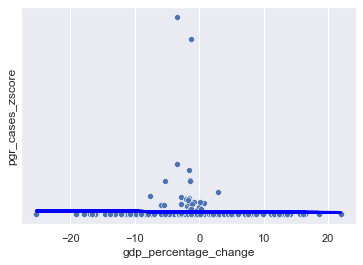

In [130]:
test_sample = covid_gdp_rate_merged.sample(100)

x_train = covid_gdp_rate_merged.iloc[:,3:4].values
y_train = covid_gdp_rate_merged.iloc[:,6:].values

x_test = test_sample.iloc[:,3:4].values
y_test = test_sample.iloc[:,6:].values
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean absolute error
print('Mean absolute error: %.2f'
      % metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error -> avg squared difference btw estimated and actual (closer to 0 = better)
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The Root mean squared error -> 
print('Root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))

# Plot outputs
sns.scatterplot(x=covid_gdp_rate_merged.gdp_percentage_change, y=covid_gdp_rate_merged.pgr_cases_zscore, s=35)


plt.plot(x_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
plt.yticks(())

plt.show()

### High GDP

Coefficients: 
 [[-0.02213808]]
Mean absolute error: 0.28
Mean squared error: 0.09
Root mean squared error: 0.31
Coefficient of determination(R²): -945.33


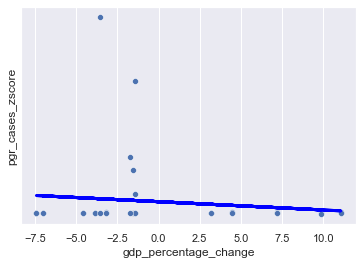

In [129]:
test_sample = high.sample(20)

x_train = high.iloc[:,3:4].values
y_train = high.iloc[:,6:].values

x_test = test_sample.iloc[:,3:4].values
y_test = test_sample.iloc[:,6:].values
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean absolute error
print('Mean absolute error: %.2f'
      % metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error -> avg squared difference btw estimated and actual (closer to 0 = better)
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The Root mean squared error -> 
print('Root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R²): %.2f'
      % metrics.r2_score(y_test, y_pred))

# Plot outputs
sns.scatterplot(x=high.gdp_percentage_change, y=high.pgr_cases_zscore, s=35)


plt.plot(x_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
plt.yticks(())

plt.show()

### Low GDP

Coefficients: 
 [[0.00335451]]
Mean absolute error: 0.66
Mean squared error: 1.65
Root mean squared error: 1.29
Coefficient of determination(R²): -0.01


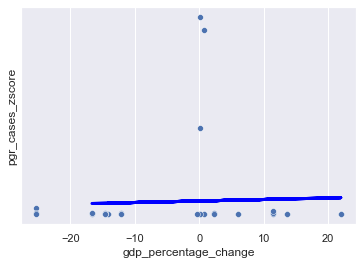

In [133]:
test_sample = low.sample(20)

x_train = low.iloc[:,3:4].values
y_train = low.iloc[:,6:].values

x_test = test_sample.iloc[:,3:4].values
y_test = test_sample.iloc[:,6:].values
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean absolute error
print('Mean absolute error: %.2f'
      % metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error -> avg squared difference btw estimated and actual (closer to 0 = better)
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The Root mean squared error -> 
print('Root mean squared error: %.2f'
      % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(R²): %.2f'
      % metrics.r2_score(y_test, y_pred))

# Plot outputs
sns.scatterplot(x=low.gdp_percentage_change, y=low.pgr_cases_zscore, s=35)


plt.plot(x_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
plt.yticks(())

plt.show()

**Q:** Are there more COVID19 in the colder months?

**Q:** Is there already a measurable effect of the vaccination?
